In [1]:
import numpy as np
import matplotlib.pyplot as plt

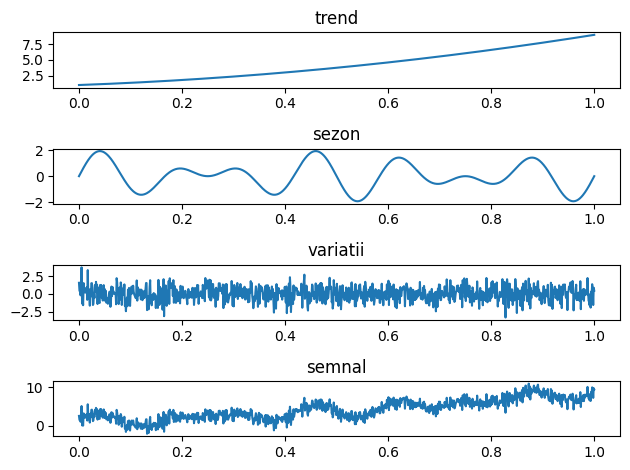

In [35]:
# a)

trend = lambda x : 5 * x ** 2 + 3 * x + 1
sezon = lambda x: np.sin(2 * np.pi * 5 * x) + np.sin(2 * np.pi * 7 * x)
variatii = lambda x:  np.random.normal(0,1,len(x))

N = 1000
time = np.linspace(0, 1, N)
t = trend(time)
s = sezon(time)
v = variatii(time)

signal = t + s + v 

fig, axs = plt.subplots(4)
axs[0].plot(time, t)
axs[0].set_title("trend")
axs[1].plot(time, s)
axs[1].set_title("sezon")
axs[2].plot(time, v)
axs[2].set_title("variatii")
axs[3].plot(time, signal)
axs[3].set_title("semnal")

fig.savefig("ex1_a.pdf")
fig.tight_layout()
fig.show()



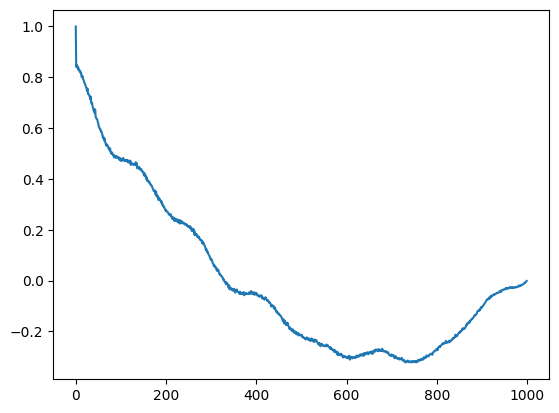

In [59]:
# b)

signalAltered = (signal - np.mean(signal)) / (np.std(signal))
correlation_vector = np.correlate(signalAltered, signalAltered, mode="full") 
correlation_vector = correlation_vector[correlation_vector.size // 2:] / N

plt.plot(correlation_vector)
plt.savefig("ex1_b.pdf")
plt.show()

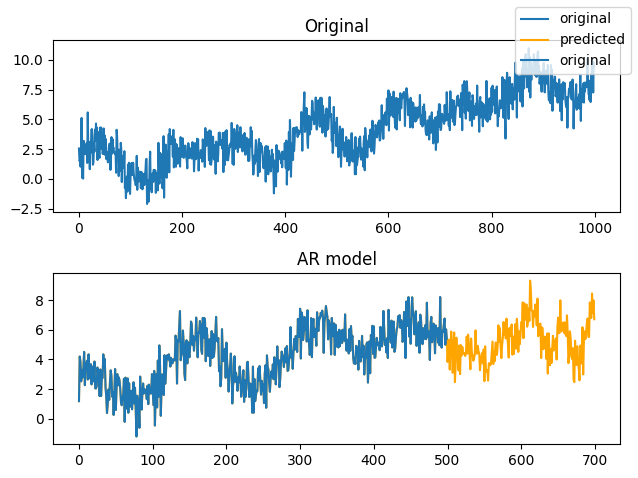

In [60]:
# c)

p = 2

def train(trainSignal, p):
    Y =  trainSignal[p - 1 : trainSignal.size - 1]
    Y = Y[::-1]
    for i in range(2, p + 1):
        shifted = trainSignal[p - i : trainSignal.size - i][::-1]
        Y = np.column_stack((Y, shifted))

    x_star = np.linalg.lstsq(Y, trainSignal[p:], rcond=None)[0]
    
    return x_star

def predict(trainSignal, predictionsNeeded, p, x_star):
    result = trainSignal.copy()
    for _ in range(predictionsNeeded):    
        y_pred = x_star.T @ result[-p : ]
        result = np.append(result, y_pred)
    
    return result
    

foldSize = 800
p = 300
trainSignal = signal[p : foldSize]
testSignal = signal[foldSize:]

x_star = train(trainSignal, p)
predictions = predict(trainSignal, len(testSignal), p, x_star)

fig, axs = plt.subplots(2)
axs[0].plot(signal, label="original")
axs[0].set_title("Original")
axs[1].plot(predictions, label="predicted", color="orange")
axs[1].plot(trainSignal, label="original")
axs[1].set_title("AR model")

fig.legend()
fig.tight_layout()
fig.savefig("ex1_c.pdf")
fig.show()
        

In [58]:
# d)

def crossValidation(signal):
    
    for p in range(1, N):
        for m in range(p, N):
            for start in range(0, N - m, 1):
                trainSignal = signal[p + start: p + start + m]
                x_star = train(trainSignal, p)
                predictions = predict(trainSignal, 1, p, x_star)

crossValidation(signal)

LinAlgError: 1-dimensional array given. Array must be two-dimensional